# padding - all envs

## plot mean sum of total reward with variance (or StdDev)

df.sum():  99775.43999999999 df.var():  59398.66109144287 df.stddev():  243.71840531942365
df.sum():  105676.19999999998 df.var():  24644.859902585493 df.stddev():  156.9868144226944
df.sum():  106882.64000000001 df.var():  18347.549021884905 df.stddev():  135.45312481402894
df.sum():  107364.22 df.var():  17532.2792284904 df.stddev():  132.4095133609757
df.sum():  106824.15 df.var():  18135.808536655557 df.stddev():  134.66925609305028
df.sum():  106435.34 df.var():  22316.676615045868 df.stddev():  149.3876722325034
df.sum():  105981.48000000001 df.var():  23342.182940917435 df.stddev():  152.78148755957784
df.sum():  103194.78 df.var():  40645.94228353629 df.stddev():  201.60838842552235
df.sum():  100365.81000000001 df.var():  52392.17666529608 df.stddev():  228.89337400915755
df.sum():  101492.34 df.var():  53118.3059044537 df.stddev():  230.47408944272607
df.sum():  98346.13000000002 df.var():  66657.52822836532 df.stddev():  258.1811926309996
{0.0: 99775.43999999999, 1.0: 105676

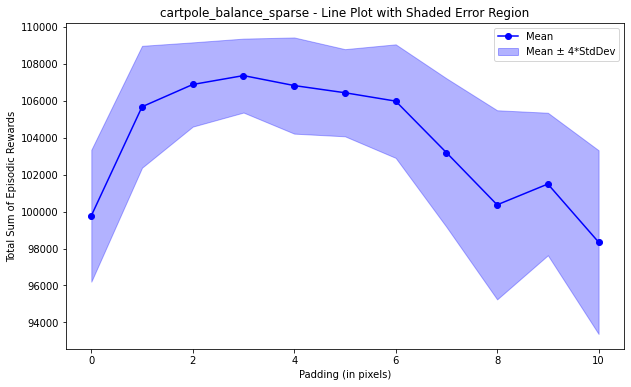

{'cartpole_balance_sparse': {'episode_reward_sorted': [(3.0, 107364.22), (2.0, 106882.64000000001), (4.0, 106824.15), (5.0, 106435.34), (6.0, 105981.48000000001), (1.0, 105676.19999999998), (7.0, 103194.78), (9.0, 101492.34), (8.0, 100365.81000000001), (0.0, 99775.43999999999), (10.0, 98346.13000000002)], 'range_top_five': (2.0, 3.0)}}
df.sum():  50723.1 df.var():  63395.60834412008 df.stddev():  251.78484534244726
df.sum():  68220.14 df.var():  56592.3517334779 df.stddev():  237.89147049332792
df.sum():  69059.01000000001 df.var():  49259.885708498754 df.stddev():  221.94568188748065
df.sum():  71492.54999999999 df.var():  73436.82906542951 df.stddev():  270.9923044394979
df.sum():  74282.47 df.var():  54468.71057015011 df.stddev():  233.38532638139466
df.sum():  77324.03999999998 df.var():  62014.08148877399 df.stddev():  249.02626666433
df.sum():  74076.5 df.var():  58489.63701818182 df.stddev():  241.84630867181292
df.sum():  70847.77 df.var():  65237.37665371978 df.stddev():  255.

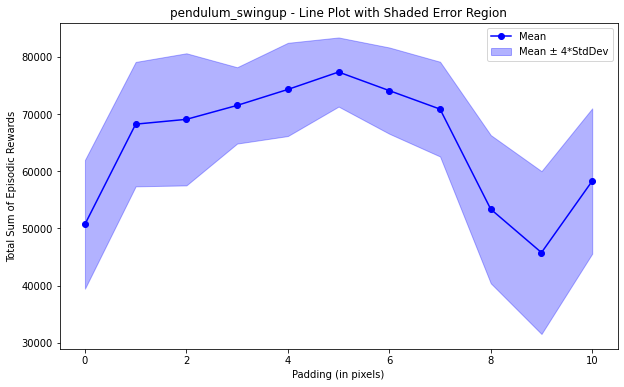

{'cartpole_balance_sparse': {'episode_reward_sorted': [(3.0, 107364.22), (2.0, 106882.64000000001), (4.0, 106824.15), (5.0, 106435.34), (6.0, 105981.48000000001), (1.0, 105676.19999999998), (7.0, 103194.78), (9.0, 101492.34), (8.0, 100365.81000000001), (0.0, 99775.43999999999), (10.0, 98346.13000000002)], 'range_top_five': (2.0, 3.0)}, 'pendulum_swingup': {'episode_reward_sorted': [(5.0, 77324.03999999998), (4.0, 74282.47), (6.0, 74076.5), (3.0, 71492.54999999999), (7.0, 70847.77), (2.0, 69059.01000000001), (1.0, 68220.14), (10.0, 58287.240000000005), (8.0, 53365.259999999995), (0.0, 50723.1), (9.0, 45786.02)], 'range_top_five': (3.0, 5.0)}}
df.sum():  7774.683567107964 df.var():  154.90499936463308 df.stddev():  12.446083695871287
df.sum():  22715.404487664808 df.var():  5908.5319224244795 df.stddev():  76.86697549939427
df.sum():  32046.412643818327 df.var():  11845.753872234118 df.stddev():  108.83820042721268
df.sum():  35973.13933722214 df.var():  15504.163453807394 df.stddev():  

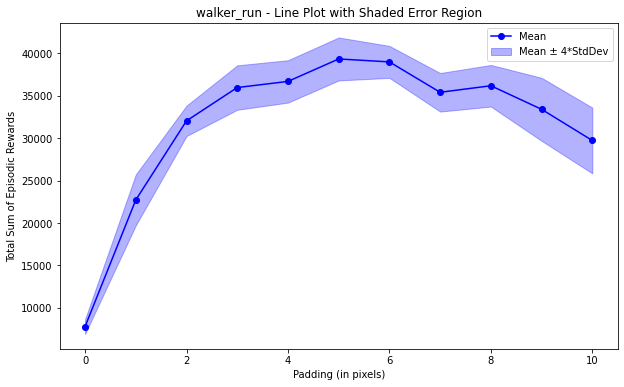

{'cartpole_balance_sparse': {'episode_reward_sorted': [(3.0, 107364.22), (2.0, 106882.64000000001), (4.0, 106824.15), (5.0, 106435.34), (6.0, 105981.48000000001), (1.0, 105676.19999999998), (7.0, 103194.78), (9.0, 101492.34), (8.0, 100365.81000000001), (0.0, 99775.43999999999), (10.0, 98346.13000000002)], 'range_top_five': (2.0, 3.0)}, 'pendulum_swingup': {'episode_reward_sorted': [(5.0, 77324.03999999998), (4.0, 74282.47), (6.0, 74076.5), (3.0, 71492.54999999999), (7.0, 70847.77), (2.0, 69059.01000000001), (1.0, 68220.14), (10.0, 58287.240000000005), (8.0, 53365.259999999995), (0.0, 50723.1), (9.0, 45786.02)], 'range_top_five': (3.0, 5.0)}, 'walker_run': {'episode_reward_sorted': [(5.0, 39344.69886539146), (6.0, 38997.983519893525), (4.0, 36696.21519032852), (8.0, 36184.35500605046), (3.0, 35973.13933722214), (7.0, 35413.27618512746), (9.0, 33405.26264397501), (2.0, 32046.412643818327), (10.0, 29726.26316960122), (1.0, 22715.404487664808), (0.0, 7774.683567107964)], 'range_top_five': 

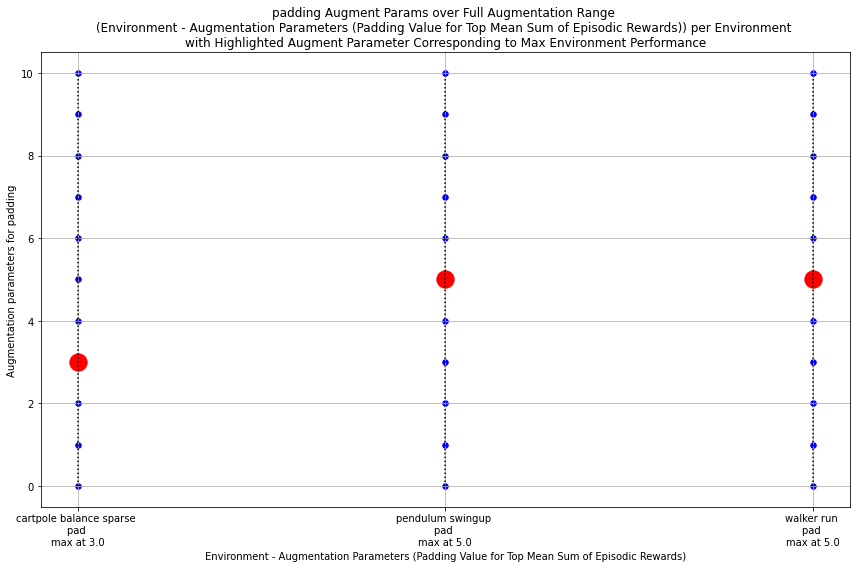

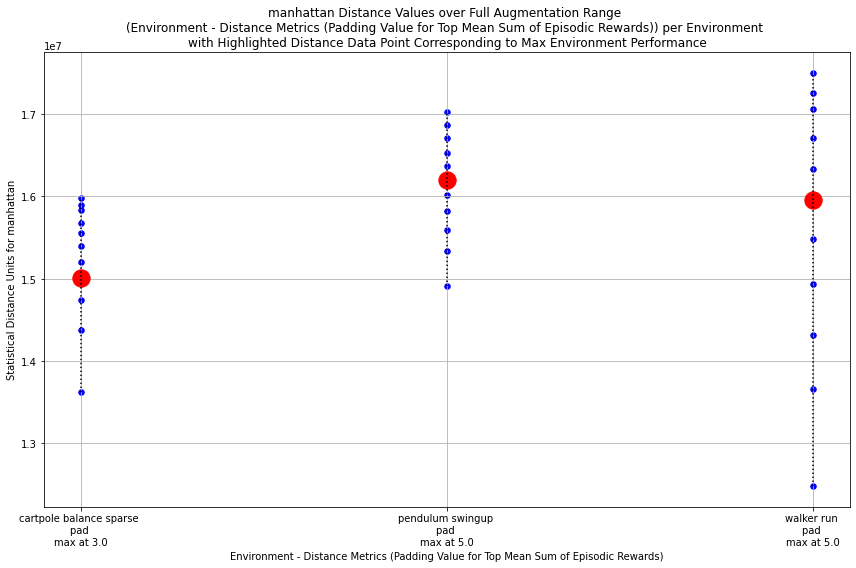

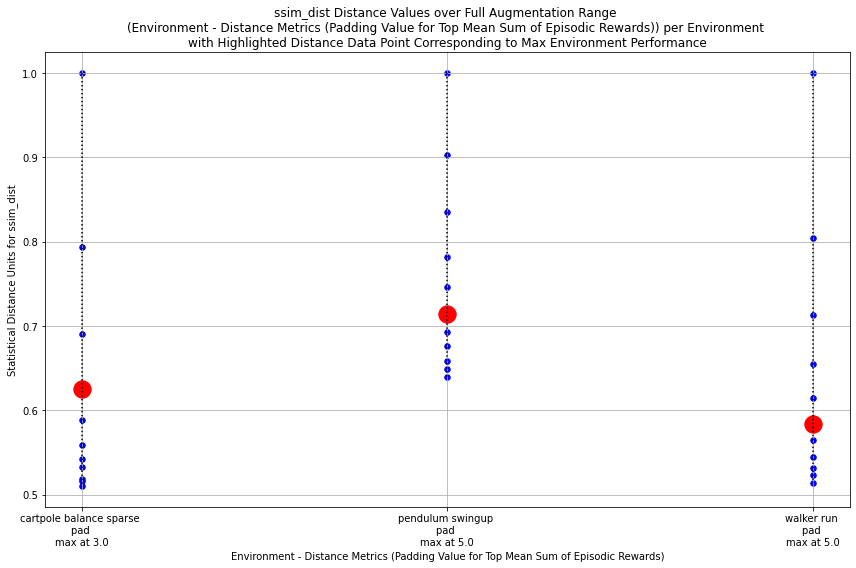

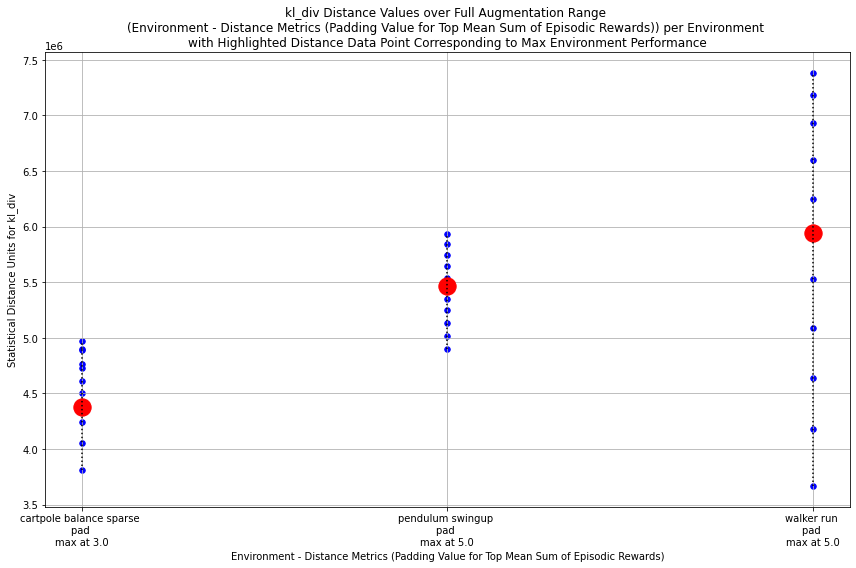

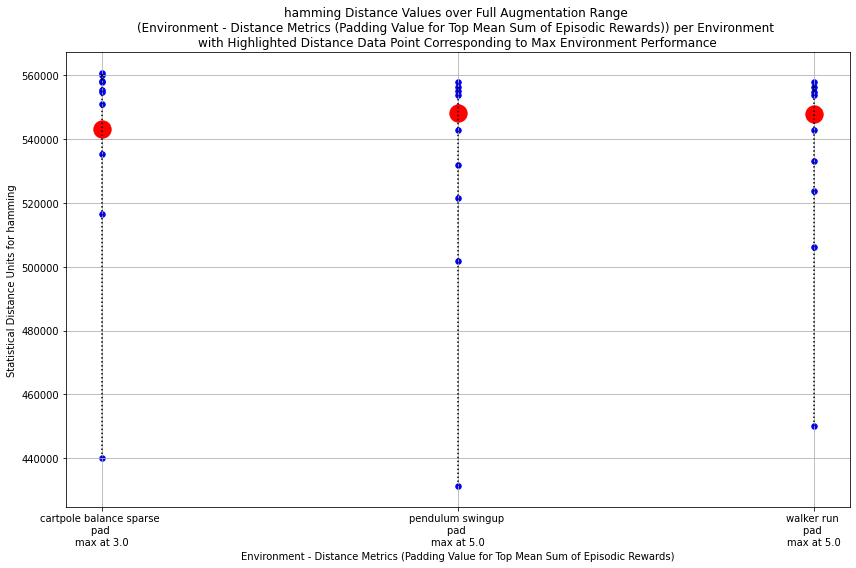

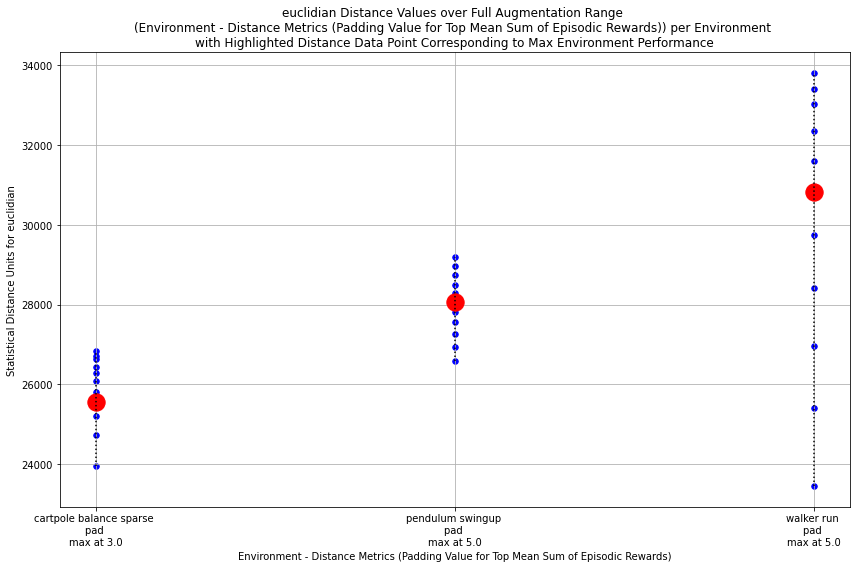

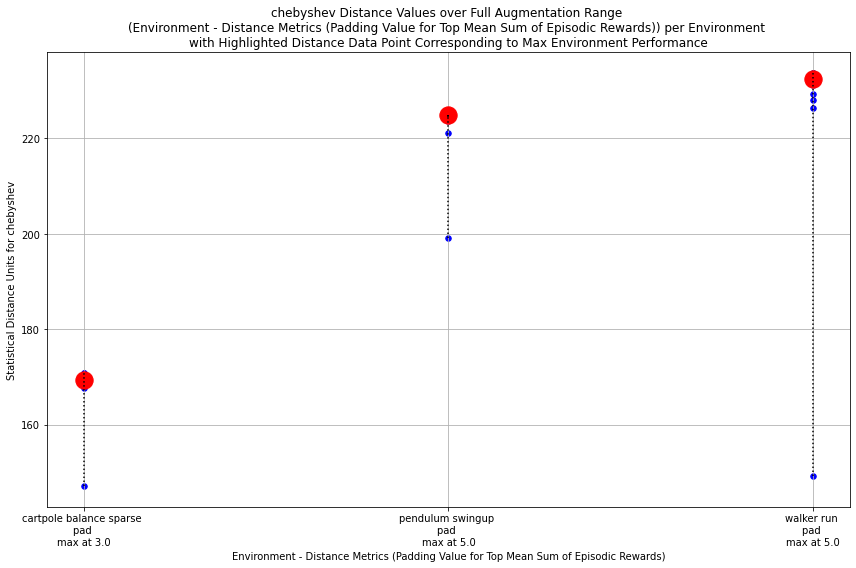

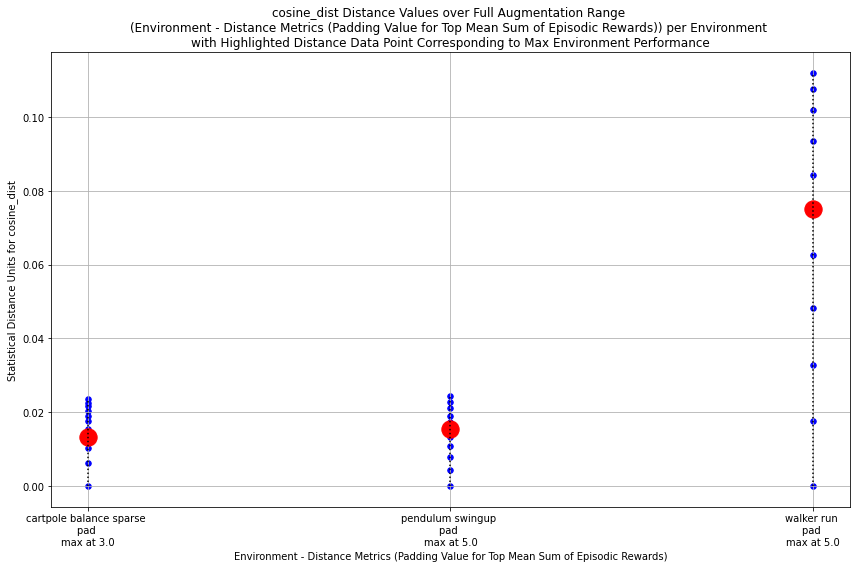

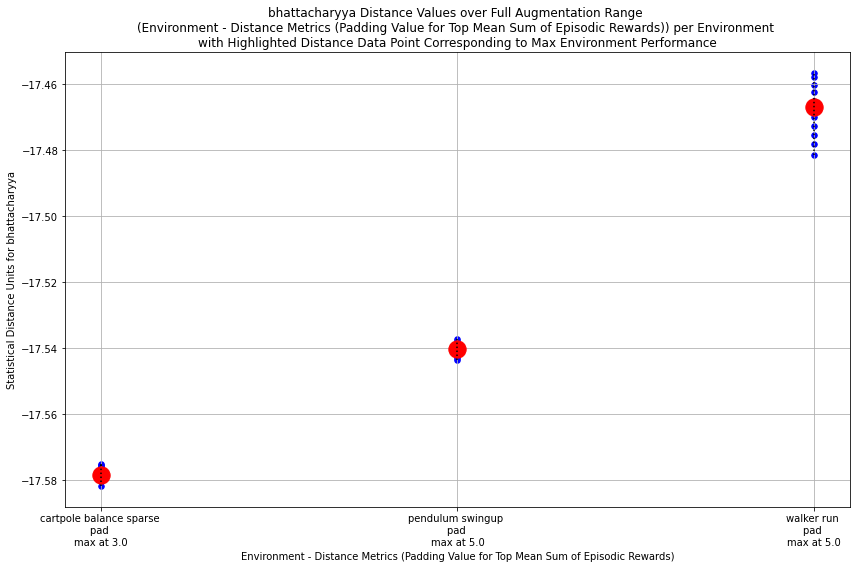

In [1]:
import process_helper as proc
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_rows', None)


EXP_TYPE = 'pad'
EXP_NAME = 'shift'
LIST_VALS = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

column_name = 'episode_reward'
XLABEL_STATS_AUG = 'Padding (in pixels)'
USE_VARIANCE = False
TIMES_STDDEV = 4
DICTS_ALL_STATS = {}
STATS_DATA = {}
MAX_INDICES = {}

plot_performance = True
plot_stats_dists = True


stats_column_names = [
        "manhattan",
        "ssim_dist",
        "kl_div",
        "hamming",
        "euclidian",
        "chebyshev",
        "cosine_dist",
        "bhattacharyya"
]

env_names = [
    'cartpole_balance_sparse',
#     'finger_turn_hard',
    'pendulum_swingup',
#     'quadruped_run',
#     'reacher_hard',
    'walker_run'
]

ENV_MAX_TOP = {}
MAX_INDICES_TOP = {}

all_stats_padding = {}
for env_name in env_names:
    DICTS_ALL_STATS[env_name] = {}
    MAX_TOP_FIVE = proc.process_and_analyze_data(EXP_TYPE, env_name, EXP_NAME, LIST_VALS, column_name, 
                                                 XLABEL_STATS_AUG, USE_VARIANCE, TIMES_STDDEV, DICTS_ALL_STATS,
                                                show=plot_performance)

    proc.process_and_generate_aug_stats(EXP_TYPE, env_name, EXP_NAME, LIST_VALS, MAX_TOP_FIVE, stats_column_names, 
                                        STATS_DATA, MAX_INDICES)
    print(DICTS_ALL_STATS)
    all_stats_padding = DICTS_ALL_STATS
    ENV_MAX_TOP[env_name + '_pad_max_at_' + str(MAX_TOP_FIVE)] = {}
    MAX_INDICES_TOP[env_name + '_pad_max_at_' + str(MAX_TOP_FIVE)] = {}
    ENV_MAX_TOP[env_name + '_pad_max_at_' + str(MAX_TOP_FIVE)]['padding'] = LIST_VALS
    MAX_INDICES_TOP[env_name + '_pad_max_at_' + str(MAX_TOP_FIVE)]['padding'] = MAX_TOP_FIVE

    
XLABEL_STATS = 'Environment - Augmentation Parameters (Padding Value for Top Mean Sum of Episodic Rewards)'
proc.plot_rewards_similar_to_stats_metrics(
        ENV_MAX_TOP, MAX_INDICES_TOP, ['padding'], XLABEL_STATS, show=plot_stats_dists, augment_type='padding')    

    
XLABEL_STATS = 'Environment - Distance Metrics (Padding Value for Top Mean Sum of Episodic Rewards)'
proc.plot_statistical_distance_metrics(
    STATS_DATA, MAX_INDICES, stats_column_names, XLABEL_STATS, show=plot_stats_dists, augment_type='padding')

df.sum():  99699.64000000001 df.var():  59338.19359436197 df.stddev():  243.59432176132918
df.sum():  99176.69 df.var():  62630.11571717263 df.stddev():  250.26009613434707
df.sum():  99244.91 df.var():  60406.89044327773 df.stddev():  245.77813255714537
df.sum():  99538.18000000001 df.var():  56939.24932006672 df.stddev():  238.61946550955713
df.sum():  99607.81000000001 df.var():  59120.58452401168 df.stddev():  243.14724864577778
df.sum():  99579.27 df.var():  57543.39483687241 df.stddev():  239.88204358991194
df.sum():  99552.33 df.var():  59483.72643253545 df.stddev():  243.892858510731
df.sum():  98763.34999999999 df.var():  59026.911127481246 df.stddev():  242.9545453937449
df.sum():  100125.16000000002 df.var():  56369.344262585495 df.stddev():  237.42229099767675
df.sum():  98727.53000000001 df.var():  63002.298556972484 df.stddev():  251.0025867535482
df.sum():  98614.01999999999 df.var():  60886.82480246873 df.stddev():  246.75255784382202
df.sum():  99387.26000000001 df.var

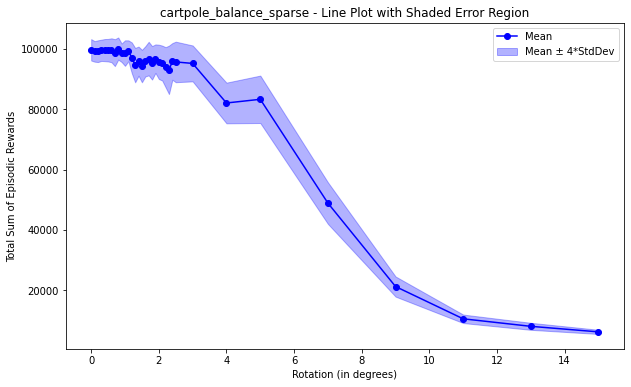

{'cartpole_balance_sparse': {'episode_reward_sorted': [(0.8, 100125.16000000002), (0.0, 99699.64000000001), (0.4, 99607.81000000001), (0.5, 99579.27), (0.6, 99552.33), (0.3, 99538.18000000001), (1.1, 99387.26000000001), (0.2, 99244.91), (0.1, 99176.69), (0.7, 98763.34999999999), (0.9, 98727.53000000001), (1.0, 98614.01999999999), (1.2, 97059.22999999998), (1.7, 96796.13999999998), (1.9, 96770.41), (1.4, 95949.31000000001), (1.6, 95872.45000000001), (2.4, 95852.61000000003), (2.0, 95715.87999999999), (2.5, 95680.88), (1.8, 95390.40999999999), (2.1, 95304.76999999997), (3.0, 95192.99000000002), (1.3, 94627.38), (1.5, 94312.9), (2.2, 93932.06999999999), (2.3, 93055.42), (5.0, 83293.53000000003), (4.0, 82069.24), (7.0, 48866.920000000006), (9.0, 21196.729999999996), (11.0, 10496.64), (13.0, 8004.739999999999), (15.0, 6164.490000000001)], 'range_top_five': (0.0, 0.8)}}
df.sum():  47929.60999999999 df.var():  39487.2483483653 df.stddev():  198.71398629277533
df.sum():  62988.76000000001 df.v

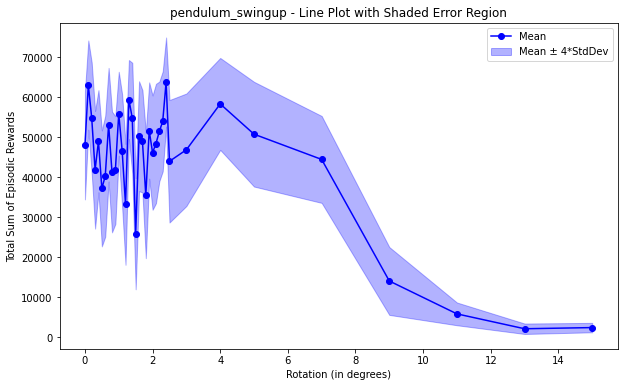

{'cartpole_balance_sparse': {'episode_reward_sorted': [(0.8, 100125.16000000002), (0.0, 99699.64000000001), (0.4, 99607.81000000001), (0.5, 99579.27), (0.6, 99552.33), (0.3, 99538.18000000001), (1.1, 99387.26000000001), (0.2, 99244.91), (0.1, 99176.69), (0.7, 98763.34999999999), (0.9, 98727.53000000001), (1.0, 98614.01999999999), (1.2, 97059.22999999998), (1.7, 96796.13999999998), (1.9, 96770.41), (1.4, 95949.31000000001), (1.6, 95872.45000000001), (2.4, 95852.61000000003), (2.0, 95715.87999999999), (2.5, 95680.88), (1.8, 95390.40999999999), (2.1, 95304.76999999997), (3.0, 95192.99000000002), (1.3, 94627.38), (1.5, 94312.9), (2.2, 93932.06999999999), (2.3, 93055.42), (5.0, 83293.53000000003), (4.0, 82069.24), (7.0, 48866.920000000006), (9.0, 21196.729999999996), (11.0, 10496.64), (13.0, 8004.739999999999), (15.0, 6164.490000000001)], 'range_top_five': (0.0, 0.8)}, 'pendulum_swingup': {'episode_reward_sorted': [(2.4, 63768.090000000004), (0.1, 62988.76000000001), (1.3, 59392.99000000001

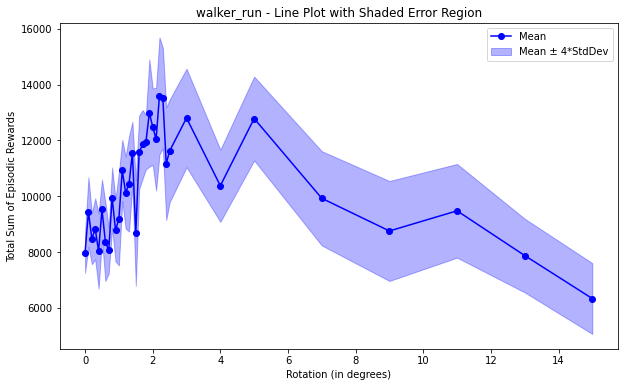

{'cartpole_balance_sparse': {'episode_reward_sorted': [(0.8, 100125.16000000002), (0.0, 99699.64000000001), (0.4, 99607.81000000001), (0.5, 99579.27), (0.6, 99552.33), (0.3, 99538.18000000001), (1.1, 99387.26000000001), (0.2, 99244.91), (0.1, 99176.69), (0.7, 98763.34999999999), (0.9, 98727.53000000001), (1.0, 98614.01999999999), (1.2, 97059.22999999998), (1.7, 96796.13999999998), (1.9, 96770.41), (1.4, 95949.31000000001), (1.6, 95872.45000000001), (2.4, 95852.61000000003), (2.0, 95715.87999999999), (2.5, 95680.88), (1.8, 95390.40999999999), (2.1, 95304.76999999997), (3.0, 95192.99000000002), (1.3, 94627.38), (1.5, 94312.9), (2.2, 93932.06999999999), (2.3, 93055.42), (5.0, 83293.53000000003), (4.0, 82069.24), (7.0, 48866.920000000006), (9.0, 21196.729999999996), (11.0, 10496.64), (13.0, 8004.739999999999), (15.0, 6164.490000000001)], 'range_top_five': (0.0, 0.8)}, 'pendulum_swingup': {'episode_reward_sorted': [(2.4, 63768.090000000004), (0.1, 62988.76000000001), (1.3, 59392.99000000001

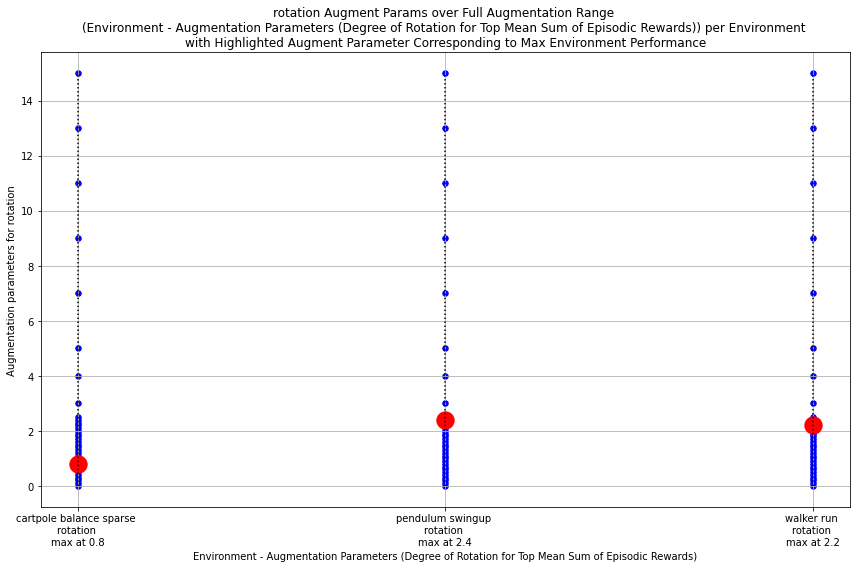

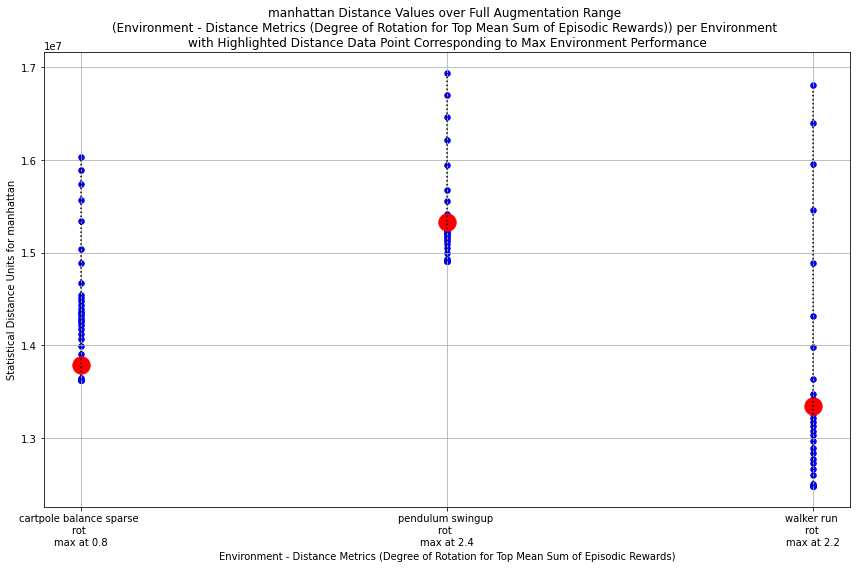

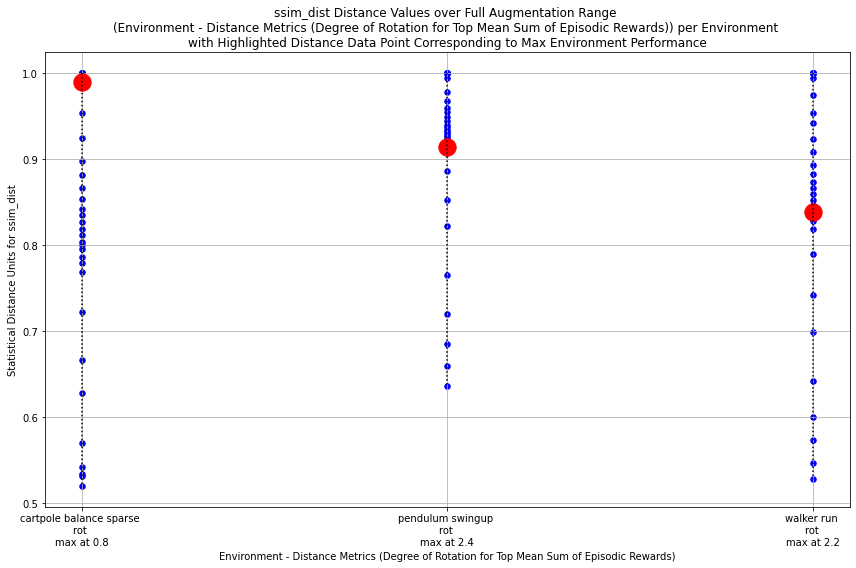

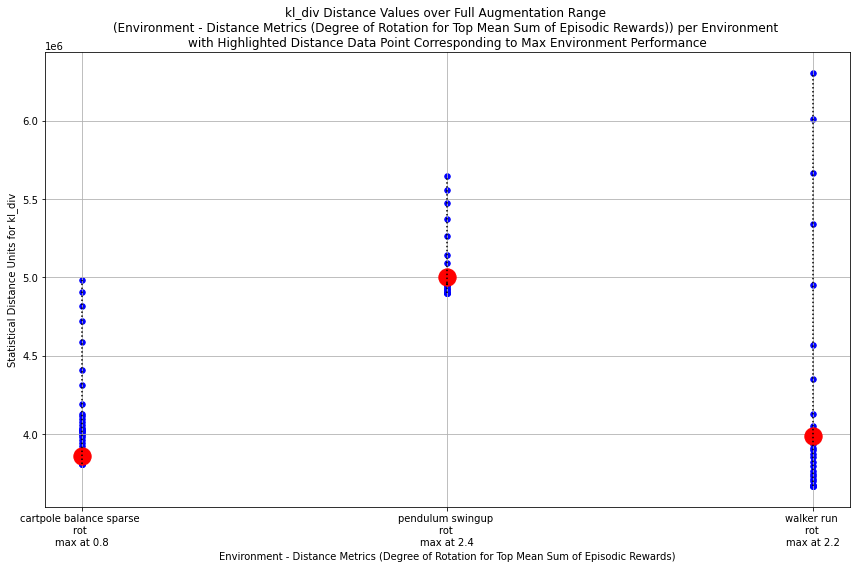

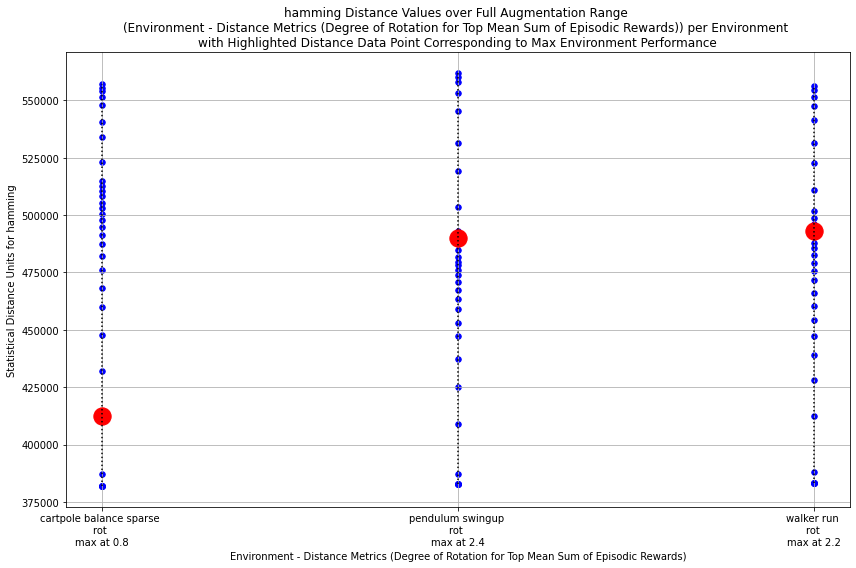

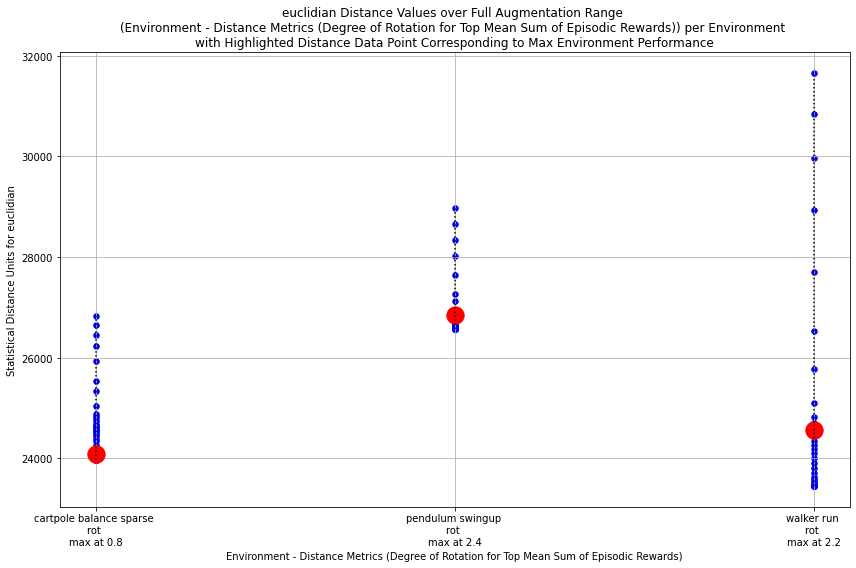

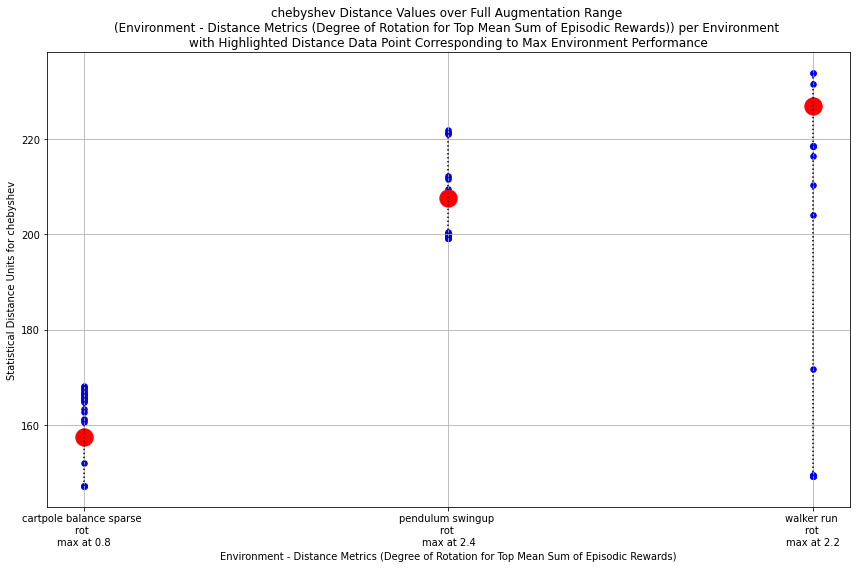

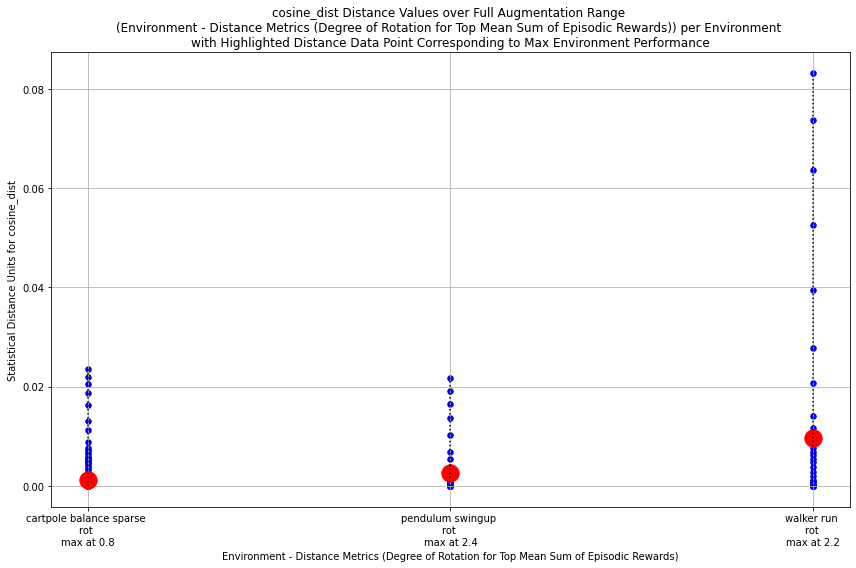

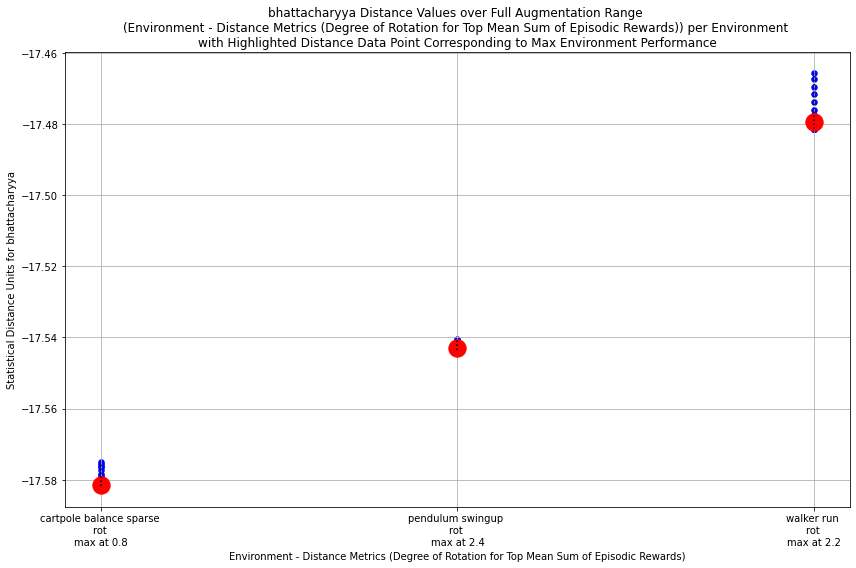

In [2]:
import process_helper as proc
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_rows', None)


EXP_TYPE = 'rot'
EXP_NAME = 'rotate'
# LIST_VALS = [1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.1, 2.2, 2.3, 2.4, 2.5]
# LIST_VALS = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8,
#              1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 4, 5, 7, 9, 11, 13, 15]   

LIST_VALS = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 
                1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 
                2.1, 2.2, 2.3, 2.4, 2.5, 
                3, 4, 5, 7, 9, 11, 13, 15]
# LIST_VALS = [0.1, 0.5, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 2, 2.5, 3, 4, 5, 7, 9, 11, 13, 15]

column_name = 'episode_reward'
XLABEL_STATS_AUG = 'Rotation (in degrees)'
USE_VARIANCE = False
# TIMES_STDDEV = 4
DICTS_ALL_STATS = {}
STATS_DATA = {}
MAX_INDICES = {}

ENV_MAX_TOP = {}
MAX_INDICES_TOP = {}

# plot_performance = True
# plot_stats_dists = True


stats_column_names = [
        "manhattan",
        "ssim_dist",
        "kl_div",
        "hamming",
        "euclidian",
        "chebyshev",
        "cosine_dist",
        "bhattacharyya"
]

env_names = [
    'cartpole_balance_sparse',
#     'finger_turn_hard',
    'pendulum_swingup',
#     'quadruped_run',
#     'reacher_hard',
    'walker_run'
]

all_stats_rot = {}
for env_name in env_names:
    DICTS_ALL_STATS[env_name] = {}
    MAX_TOP_FIVE = proc.process_and_analyze_data(EXP_TYPE, env_name, EXP_NAME, LIST_VALS, column_name, 
                                                 XLABEL_STATS_AUG, USE_VARIANCE, TIMES_STDDEV, DICTS_ALL_STATS,
                                                show=plot_performance)
    proc.process_and_generate_aug_stats(EXP_TYPE, env_name, EXP_NAME, LIST_VALS, MAX_TOP_FIVE, stats_column_names, 
                                        STATS_DATA, MAX_INDICES)
    
    print(DICTS_ALL_STATS)
    all_stats_rot = DICTS_ALL_STATS
    ENV_MAX_TOP[env_name + '_rotation_max_at_' + str(MAX_TOP_FIVE)] = {}
    MAX_INDICES_TOP[env_name + '_rotation_max_at_' + str(MAX_TOP_FIVE)] = {}
    ENV_MAX_TOP[env_name + '_rotation_max_at_' + str(MAX_TOP_FIVE)]['rotation'] = LIST_VALS
    MAX_INDICES_TOP[env_name + '_rotation_max_at_' + str(MAX_TOP_FIVE)]['rotation'] = MAX_TOP_FIVE

    
# print(ENV_MAX_TOP, MAX_INDICES_TOP)
    
    
XLABEL_STATS = 'Environment - Augmentation Parameters (Degree of Rotation for Top Mean Sum of Episodic Rewards)'
proc.plot_rewards_similar_to_stats_metrics(
        ENV_MAX_TOP, MAX_INDICES_TOP, ['rotation'], XLABEL_STATS, show=plot_stats_dists, augment_type='rotation')    

    
XLABEL_STATS = 'Environment - Distance Metrics (Degree of Rotation for Top Mean Sum of Episodic Rewards)'
proc.plot_statistical_distance_metrics(
    STATS_DATA, MAX_INDICES, stats_column_names, XLABEL_STATS, show=plot_stats_dists, augment_type='rotation')

df.sum():  3693.5299999999997 df.var():  76.46241502085071 df.stddev():  8.744278988049885
df.sum():  8854.519999999999 df.var():  509.0537697748123 df.stddev():  22.562219965571035
df.sum():  22258.240000000005 df.var():  3597.0584585821525 df.stddev():  59.975482145474686
df.sum():  29102.43 df.var():  11696.517009516263 df.stddev():  108.15043693631692
df.sum():  33471.78999999999 df.var():  12087.073744862382 df.stddev():  109.94122859447397
df.sum():  81376.04999999997 df.var():  79574.53205075063 df.stddev():  282.08958160618164
df.sum():  92859.90000000002 df.var():  71630.95216063387 df.stddev():  267.63959378356907
df.sum():  97565.68 df.var():  63174.34861047538 df.stddev():  251.345078747278
df.sum():  97682.65000000001 df.var():  67284.30542072562 df.stddev():  259.39218457911494
df.sum():  99636.85999999999 df.var():  58829.46930261885 df.stddev():  242.5478701259173
df.sum():  98473.75 df.var():  61721.61465925772 df.stddev():  248.4383518284923
df.sum():  95417.16 df.var

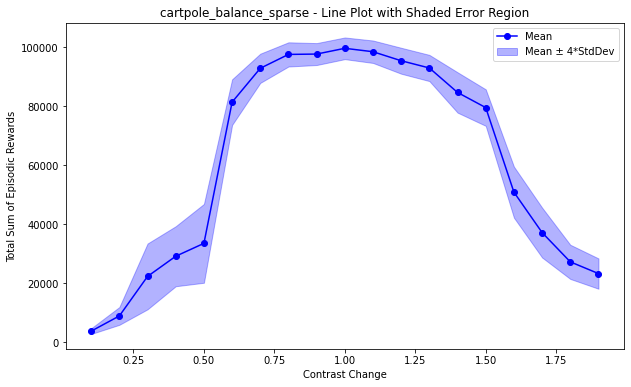

{'cartpole_balance_sparse': {'episode_reward_sorted': [(1.0, 99636.85999999999), (1.1, 98473.75), (0.9, 97682.65000000001), (0.8, 97565.68), (1.2, 95417.16), (1.3, 92962.44), (0.7, 92859.90000000002), (1.4, 84661.27), (0.6, 81376.04999999997), (1.5, 79524.09000000001), (1.6, 50843.600000000006), (1.7, 37133.909999999996), (0.5, 33471.78999999999), (0.4, 29102.43), (1.8, 27198.030000000006), (1.9, 23223.170000000002), (0.3, 22258.240000000005), (0.2, 8854.519999999999), (0.1, 3693.5299999999997)], 'range_top_five': (0.8, 1.0)}}
df.sum():  2396.9700000000003 df.var():  192.2112867472894 df.stddev():  13.864028517977356
df.sum():  7866.94 df.var():  1284.9005870225185 df.stddev():  35.84550999808091
df.sum():  15398.850000000004 df.var():  6505.457619057547 df.stddev():  80.65641709782022
df.sum():  17111.83 df.var():  4807.805213019183 df.stddev():  69.33833869526427
df.sum():  35304.54 df.var():  28006.503548490407 df.stddev():  167.35143724656328
df.sum():  46635.810000000005 df.var():

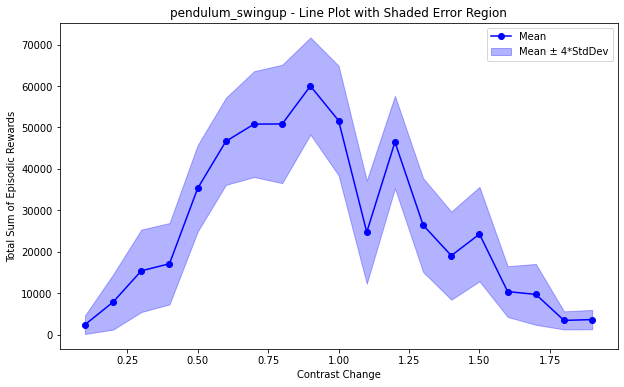

{'cartpole_balance_sparse': {'episode_reward_sorted': [(1.0, 99636.85999999999), (1.1, 98473.75), (0.9, 97682.65000000001), (0.8, 97565.68), (1.2, 95417.16), (1.3, 92962.44), (0.7, 92859.90000000002), (1.4, 84661.27), (0.6, 81376.04999999997), (1.5, 79524.09000000001), (1.6, 50843.600000000006), (1.7, 37133.909999999996), (0.5, 33471.78999999999), (0.4, 29102.43), (1.8, 27198.030000000006), (1.9, 23223.170000000002), (0.3, 22258.240000000005), (0.2, 8854.519999999999), (0.1, 3693.5299999999997)], 'range_top_five': (0.8, 1.0)}, 'pendulum_swingup': {'episode_reward_sorted': [(0.9, 59992.229999999996), (1.0, 51656.15), (0.8, 50836.049999999996), (0.7, 50792.02), (0.6, 46635.810000000005), (1.2, 46463.90999999999), (0.5, 35304.54), (1.3, 26438.87), (1.1, 24738.869999999995), (1.5, 24256.49), (1.4, 19066.100000000002), (0.4, 17111.83), (0.3, 15398.850000000004), (1.6, 10391.143333333333), (1.7, 9712.83), (0.2, 7866.94), (1.9, 3637.0300000000007), (1.8, 3441.070000000001), (0.1, 2396.9700000

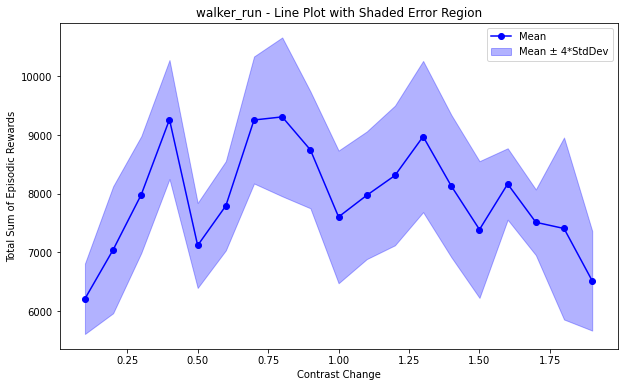

{'cartpole_balance_sparse': {'episode_reward_sorted': [(1.0, 99636.85999999999), (1.1, 98473.75), (0.9, 97682.65000000001), (0.8, 97565.68), (1.2, 95417.16), (1.3, 92962.44), (0.7, 92859.90000000002), (1.4, 84661.27), (0.6, 81376.04999999997), (1.5, 79524.09000000001), (1.6, 50843.600000000006), (1.7, 37133.909999999996), (0.5, 33471.78999999999), (0.4, 29102.43), (1.8, 27198.030000000006), (1.9, 23223.170000000002), (0.3, 22258.240000000005), (0.2, 8854.519999999999), (0.1, 3693.5299999999997)], 'range_top_five': (0.8, 1.0)}, 'pendulum_swingup': {'episode_reward_sorted': [(0.9, 59992.229999999996), (1.0, 51656.15), (0.8, 50836.049999999996), (0.7, 50792.02), (0.6, 46635.810000000005), (1.2, 46463.90999999999), (0.5, 35304.54), (1.3, 26438.87), (1.1, 24738.869999999995), (1.5, 24256.49), (1.4, 19066.100000000002), (0.4, 17111.83), (0.3, 15398.850000000004), (1.6, 10391.143333333333), (1.7, 9712.83), (0.2, 7866.94), (1.9, 3637.0300000000007), (1.8, 3441.070000000001), (0.1, 2396.9700000

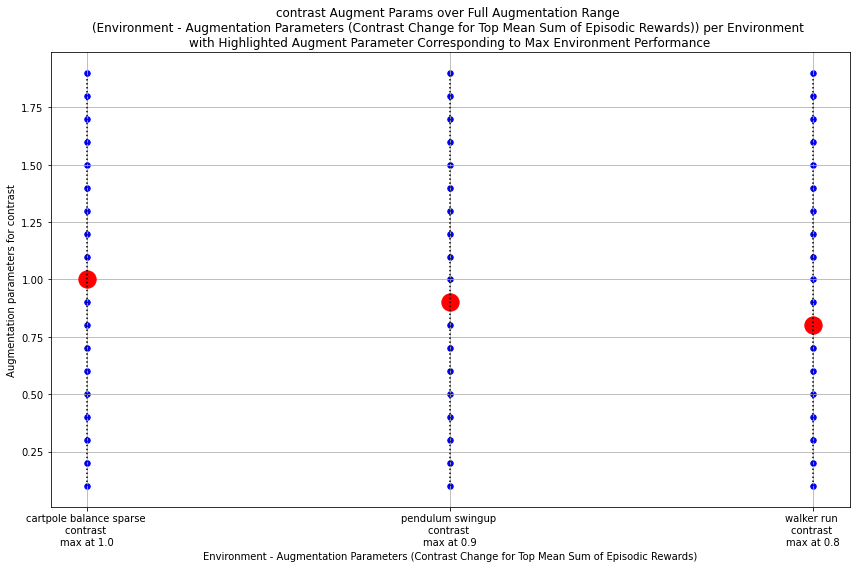

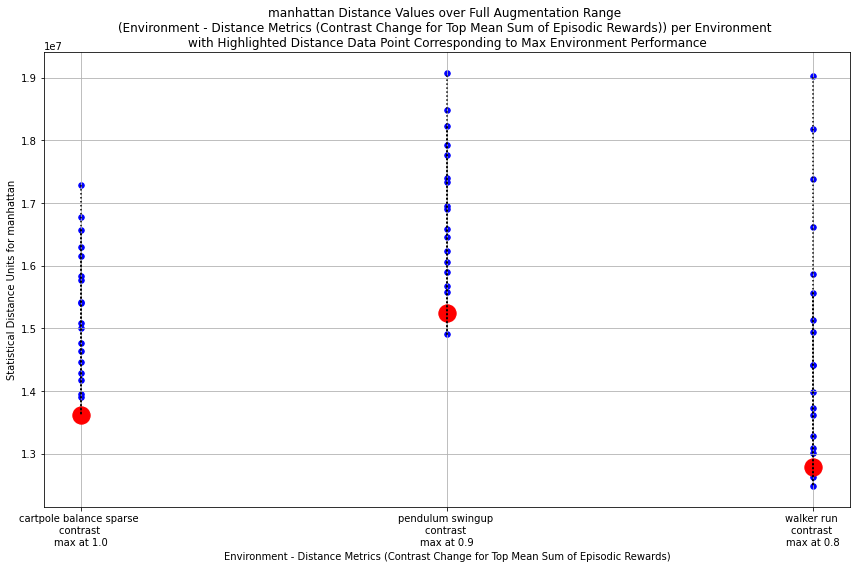

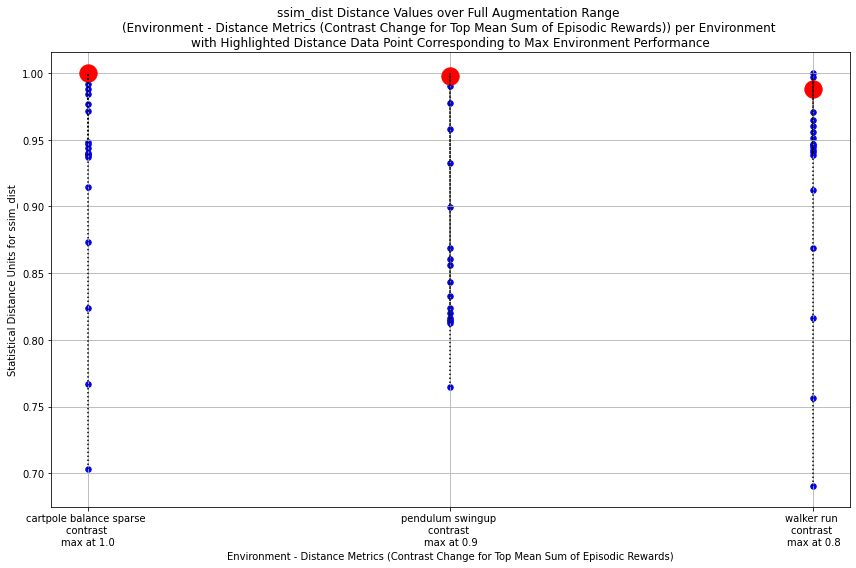

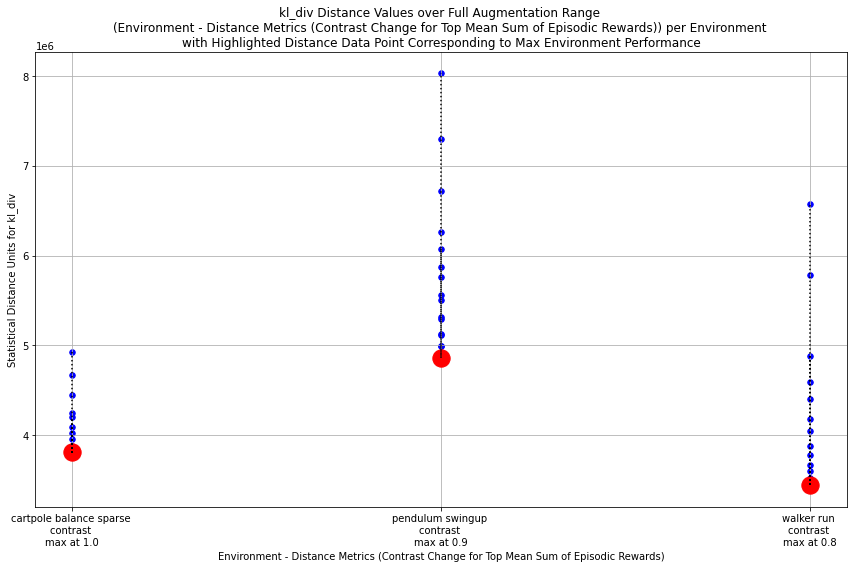

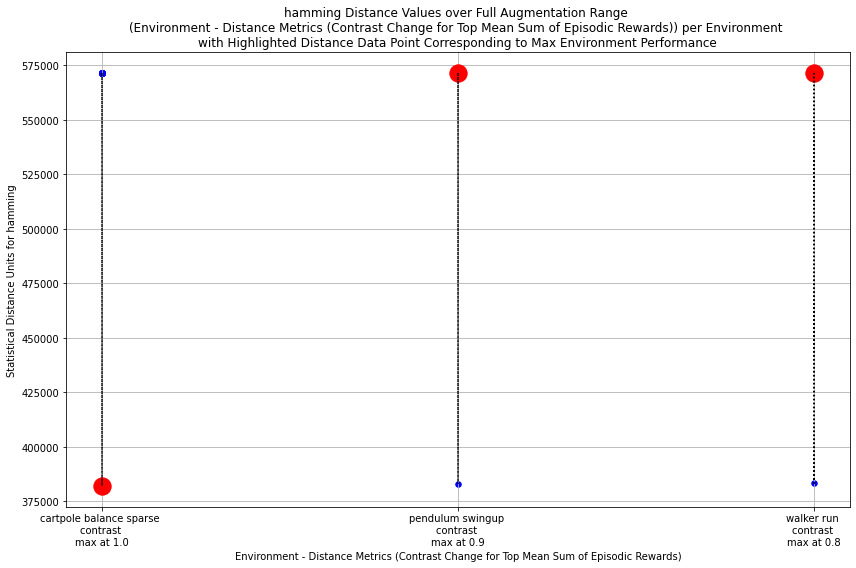

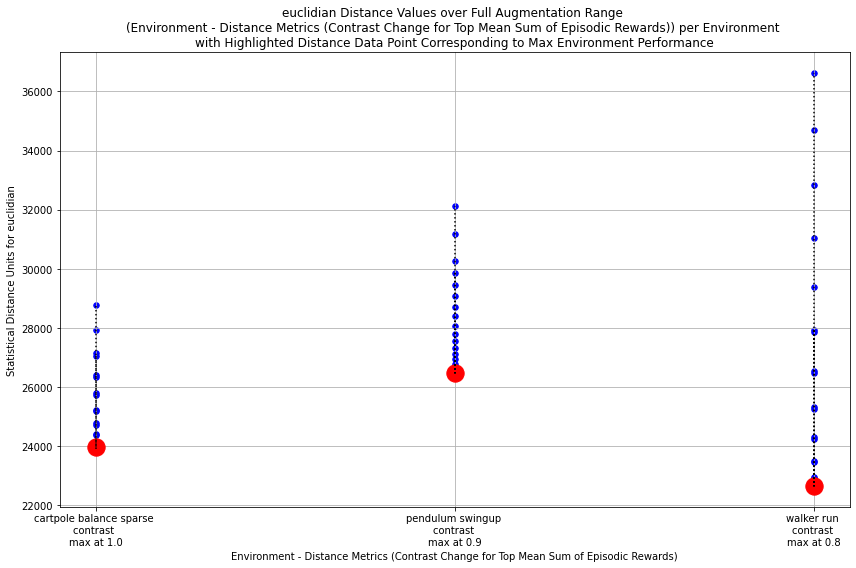

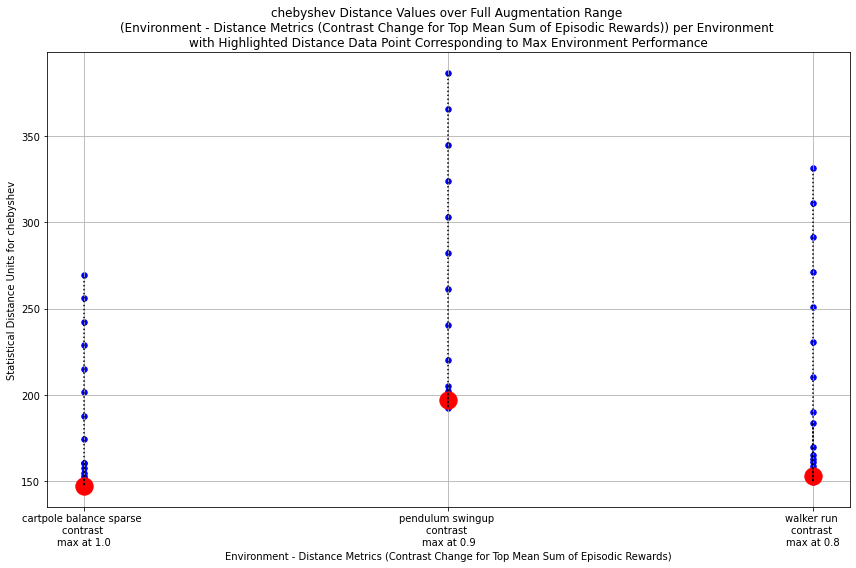

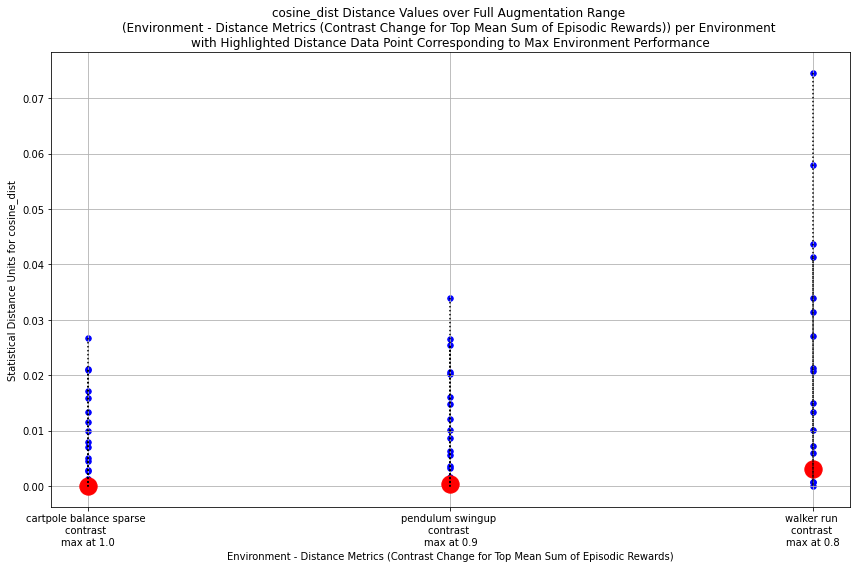

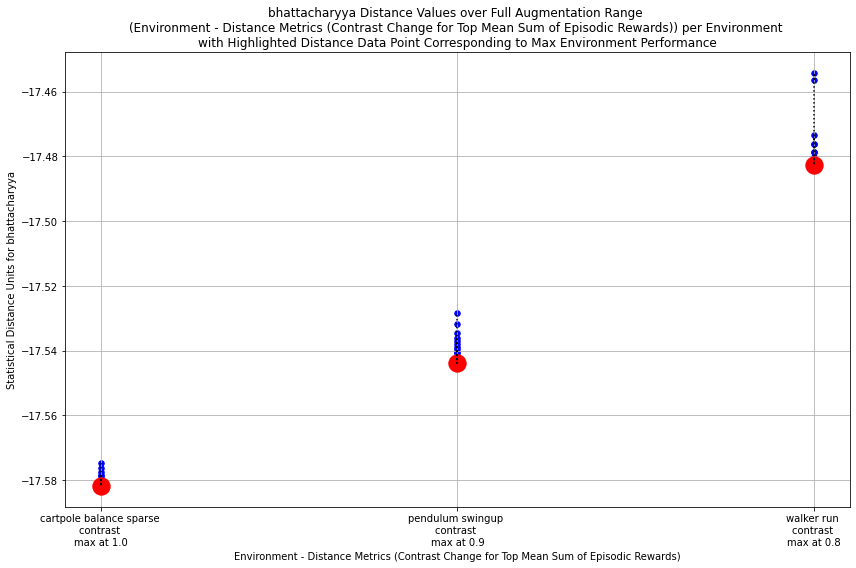

In [3]:
import process_helper as proc
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_rows', None)


EXP_TYPE = 'contrast'
EXP_NAME = 'contrast'
# LIST_VALS = [1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.1, 2.2, 2.3, 2.4, 2.5]
# LIST_VALS = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8,
#              1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 4, 5, 7, 9, 11, 13, 15]   

# LIST_VALS = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 2, 2.5, 3, 4, 5, 7, 9, 11, 13, 15]
# LIST_VALS = [0.1, 0.5, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 2, 2.5, 3, 4, 5, 7, 9, 11, 13, 15]
LIST_VALS = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]

column_name = 'episode_reward'
XLABEL_STATS_AUG = 'Contrast Change'
USE_VARIANCE = False
# TIMES_STDDEV = 4
DICTS_ALL_STATS = {}
STATS_DATA = {}
MAX_INDICES = {}
ENV_MAX_TOP = {}
MAX_INDICES_TOP = {}

# plot_performance = True
# plot_stats_dists = True


stats_column_names = [
        "manhattan",
        "ssim_dist",
        "kl_div",
        "hamming",
        "euclidian",
        "chebyshev",
        "cosine_dist",
        "bhattacharyya"
]

env_names = [
    'cartpole_balance_sparse',
#     'finger_turn_hard',
    'pendulum_swingup',
#     'quadruped_run',
#     'reacher_hard',
    'walker_run'
]

all_stats_contr = {}
for env_name in env_names:
    DICTS_ALL_STATS[env_name] = {}
    MAX_TOP_FIVE = proc.process_and_analyze_data(EXP_TYPE, env_name, EXP_NAME, LIST_VALS, column_name, 
                                                 XLABEL_STATS_AUG, USE_VARIANCE, TIMES_STDDEV, DICTS_ALL_STATS,
                                                show=plot_performance)
    proc.process_and_generate_aug_stats(EXP_TYPE, env_name, EXP_NAME, LIST_VALS, MAX_TOP_FIVE, stats_column_names, 
                                        STATS_DATA, MAX_INDICES)
    print(DICTS_ALL_STATS)
    all_stats_contr = DICTS_ALL_STATS
    ENV_MAX_TOP[env_name + '_contrast_max_at_' + str(MAX_TOP_FIVE)] = {}
    MAX_INDICES_TOP[env_name + '_contrast_max_at_' + str(MAX_TOP_FIVE)] = {}
    ENV_MAX_TOP[env_name + '_contrast_max_at_' + str(MAX_TOP_FIVE)]['contrast'] = LIST_VALS
    MAX_INDICES_TOP[env_name + '_contrast_max_at_' + str(MAX_TOP_FIVE)]['contrast'] = MAX_TOP_FIVE


XLABEL_STATS = 'Environment - Augmentation Parameters (Contrast Change for Top Mean Sum of Episodic Rewards)'
proc.plot_rewards_similar_to_stats_metrics(
        ENV_MAX_TOP, MAX_INDICES_TOP, ['contrast'], XLABEL_STATS, show=plot_stats_dists, augment_type='contrast')    

    
XLABEL_STATS = 'Environment - Distance Metrics (Contrast Change for Top Mean Sum of Episodic Rewards)'
proc.plot_statistical_distance_metrics(
    STATS_DATA, MAX_INDICES, stats_column_names, XLABEL_STATS, show=plot_stats_dists, augment_type='contrast')

In [4]:
print("padding data:")

env_names = [
    'cartpole_balance_sparse',
#     'finger_turn_hard',
    'pendulum_swingup',
#     'quadruped_run',
#     'reacher_hard',
    'walker_run'
]

all_stats = {}

for env in env_names:
    all_stats[env] = {}

print(f"{'Environment':<30} {'Padding':<10} {'Reward':<10}")

# Print data
for env in env_names:
    top_res = all_stats_padding[env]['episode_reward_sorted'][0]
    all_stats[env]['Padding'] = top_res
    print(f"{env:<30} {top_res[0]:<10} {top_res[1]:<10}")
    


print("\n\n") 
print(f"{'Environment':<30} {'Rotate':<10} {'Reward':<10}")

# Print data
for env in env_names:
    top_res = all_stats_rot[env]['episode_reward_sorted'][0]
    all_stats[env]['Rotation'] = top_res
    print(f"{env:<30} {top_res[0]:<10} {top_res[1]:<10}")



print("\n\n") 
print(f"{'Environment':<30} {'Contrast':<10} {'Reward':<10}")

# Print data
for env in env_names:
    top_res = all_stats_contr[env]['episode_reward_sorted'][0]
    all_stats[env]['Contrast'] = top_res
    print(f"{env:<30} {top_res[0]:<10} {top_res[1]:<10}")   
    
    

print("\n\n")
for env in env_names:
    padding_val, padding_reward = all_stats[env]['Padding']
    rotation_val, rotation_reward = all_stats[env]['Rotation']
    contrast_val, contrast_reward = all_stats[env]['Contrast']
    print(f"{env:<20} & {padding_reward:.2f} (pad {padding_val}) & {rotation_reward:.2f} ({rotation_val} deg) & {contrast_reward:.2f} ({contrast_val}) \\\\ \\hline")

padding data:
Environment                    Padding    Reward    
cartpole_balance_sparse        3.0        107364.22 
pendulum_swingup               5.0        77324.03999999998
walker_run                     5.0        39344.69886539146



Environment                    Rotate     Reward    
cartpole_balance_sparse        0.8        100125.16000000002
pendulum_swingup               2.4        63768.090000000004
walker_run                     2.2        13592.67937728863



Environment                    Contrast   Reward    
cartpole_balance_sparse        1.0        99636.85999999999
pendulum_swingup               0.9        59992.229999999996
walker_run                     0.8        9310.699544676027



cartpole_balance_sparse & 107364.22 (pad 3.0) & 100125.16 (0.8 deg) & 99636.86 (1.0) \\ \hline
pendulum_swingup     & 77324.04 (pad 5.0) & 63768.09 (2.4 deg) & 59992.23 (0.9) \\ \hline
walker_run           & 39344.70 (pad 5.0) & 13592.68 (2.2 deg) & 9310.70 (0.8) \\ \hline


# Insights

* In terms of performance, the average total sum over episodic rewards indicates that each environment has a relatively narrow range of augmentation values that can yield maximum total rewards.

* For different environments, the augmentation value that maximizes total rewards varies. For instance, the CartPole environment achieves its maximum performance at a padding of 3.0 pixels, whereas the Walker-Run environment reaches its peak performance at a padding of 5.0 pixels.

* The same augmentation values affect video frames (images) from different environments differently. For example, a padding of 5.0 pixels can alter a CartPole image differently compared to a Walker-Run image.

* The same range of augmentation values (e.g., padding between 1.0 and 10.0 pixels) generates varying degrees of changes in terms of statistical distances (explain why this is the case, wat elements in the image, their presence or absence may lead to these differences in a given distance, give more details about the variance between environments, maybe there is a correlation between this and a translation degree/, I will check into this more...)

* When evaluating the statistical values that reflect the degree of modifications in images at different augmentation parameters and comparing them with the corresponding augmentation parameters that yield top performance for each environment, there appears to be a consistent interval for certain metrics. Even if the augmentation parameters differ (e.g., padding of 3.0 vs. 5.0), the statistical values for certain metrics tend to fall within a specific range.

* This correlation between the degree of change (in terms of statistical distance) and learned performance does not apply to all statistical distances tested. However, some statistical distances show promising results (we may pick one stats distance that shows best performance; we can mention that we tried others but we might want to get specific one distance and make it as recommendation, let's see once we have results for other augmentations)

* objectives to look for perfect hyperparams, to include in future works, 